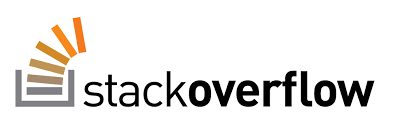


Stack Overflow is the largest, most trusted online community for developers to learn, share their knowledge, and build their careers. More than 50 million professional and aspiring programmers visit Stack Overflow each month to help solve coding problems, develop new skills, and find job opportunities.

Stack Overflow partners with businesses to help them understand, hire, engage, and enable the world's developers. Our products and services are focused on developer marketing, technical recruiting, market research, and enterprise knowledge sharing.


### import required libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pycountry

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

### Loading survey results dataset

In [2]:
results = pd.read_csv('../input/survey_results_public.csv')

### Sample data

98855 developers participated in this survey which contains 129 questions 

In [3]:
results.head()

### Util functions

In [86]:


def plotlypie(labels, values, hole, pull, colors, title):
    data = [go.Pie(
        labels = labels,
        values = values,
        hole = hole,
        pull=pull,
        marker=dict(colors=colors)
    )]
    
    layout = go.Layout(title = title)
    fig = go.Figure(data = data, layout = layout)
    
    iplot(fig)
    
def plotlybar(labels1 = None, values1 = None, name1 = None,labels2 = None, values2 = None, name2 =None, markercolor1 = '#9ECAE1', markercolor2 = '#ff99ff', title= None, mode = 'group', orientation = 'v'):
    trace1 = go.Bar(
    x = labels1,
    y = values1,
    orientation = orientation, 
    text = values1,
    name = name1,
    textposition = 'auto',
    marker=dict(
        color=markercolor1#'rgb(58,200,225)',
        )
    )    
    
    if labels2 is not None:
        trace2 = go.Bar(
            x = labels2,
            y = values2,
            name = name2,
            text = values2,
            textposition = 'auto',
            marker=dict(
                color=markercolor2#'rgb(58,200,225)',
            )
        )
        data = [trace1, trace2]
    
    else:
        data = [trace1]
    layout = go.Layout(title = title,xaxis=dict(tickangle=-25),
    barmode=mode)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    
def snslvplot(x,y,title):
    plt.figure(figsize = (16,8))
    sns.lvplot(x = x , y = y , palette = "cool" )
    plt.xticks(rotation = 75)
    plt.title(title)
    plt.show()
    
def snsstripplot(x,y,title):
    plt.figure(figsize = (16,8))
    sns.stripplot(x = x , y = y , palette = "cool" )
    plt.xticks(rotation = 75)
    plt.title(title)
    plt.show()
    
def snspointplot(x,y,data, hue, title):
    plt.figure(figsize=(16,8))
    ax = sns.pointplot(x = x, y = y ,data=data,hue=hue,palette="Set2")
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    
    


In [5]:
hobbies = results['Hobby'].value_counts()

colors = ['#FEBFB3', '#E1396C']
plotlypie(hobbies.index, hobbies.values, 0.6 ,0.05, colors, '% of developers having Coding as Hobby' )

In [6]:
opensource = results['OpenSource'].value_counts()
colors = ['#FEBFB3', '#E1396C']
plotlypie(opensource.index, opensource.values, 0.6 , 0.02,colors, '% of developers contribute to open source' )

In [7]:
age = results['Age'].value_counts()
plotlybar(age.index, age.values, 'Age', title = 'Distribution of developers based on Age')
snslvplot( results["Age"] , np.log(results['ConvertedSalary'] + 1), "Salary Based on Age")

In [8]:
oscontribyes = results[results["OpenSource"] == "Yes"]
oscontribNo = results[results["OpenSource"] == "No"]
Agewisecontribyes = oscontribyes["Age"].value_counts()
Agewisecontribno = oscontribNo["Age"].value_counts()
plotlybar(Agewisecontribyes.index, Agewisecontribyes.values, 'Contribute to open Source',Agewisecontribno.index, Agewisecontribno.values,
          'Not Contribute to open Source','#9ECAE1','#ff99ff', title = 'Contribution to Open Source based on Developer`s age')

In [9]:
yearscodingyes = oscontribyes["YearsCoding"].value_counts()
yearscodingno = oscontribNo["YearsCoding"].value_counts()
plotlybar(yearscodingyes.index, yearscodingyes.values, 'Contribute to open Source',yearscodingno.index, yearscodingno.values,
          'Not Contribute to open Source','#9ECAE1','#ff99ff', title = 'Developers contribution to Open Source based on Years of Coding')
snsstripplot( results["YearsCoding"] , np.log(results['ConvertedSalary'] + 1), "Salary Based on Years of Coding")

In [10]:
Student = results['Student'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933']
plotlypie(Student.index, Student.values, 0.4 , 0.05,colors, 'is the respondent student ?' )

In [11]:
studentsyes = oscontribyes["Student"].value_counts()
studentsno = oscontribNo["Student"].value_counts()

plotlybar(studentsyes.index, studentsyes.values, 'Contribute to open Source',studentsno.index, studentsno.values,
          'Not Contribute to open Source','#9ECAE1','#ff99ff', title = 'How much students contribute to Open Source?')



In [12]:
country_codes = {country.name:country.alpha_3 for country in pycountry.countries}
country_codes['Democratic Republic of the Congo'] = country_codes.pop('Congo, The Democratic Republic of the')
country_codes['Venezuela, Bolivarian Republic of...'] = country_codes.pop('Venezuela, Bolivarian Republic of')
country_codes['Micronesia, Federated States of...'] = country_codes.pop('Micronesia, Federated States of')
country_codes['The former Yugoslav Republic of Macedonia'] = country_codes.pop('Macedonia, Republic of')
country_codes['United Republic of Tanzania'] = country_codes.pop('Tanzania, United Republic of')
country_codes['Iran, Islamic Republic of...'] = country_codes.pop('Iran, Islamic Republic of')
country_codes['North Korea'] = country_codes.pop("Korea, Democratic People's Republic of")
country_codes['Republic of Moldova'] = country_codes.pop('Moldova, Republic of')
country_codes['Bolivia'] = country_codes.pop('Bolivia, Plurinational State of')
country_codes['Taiwan'] = country_codes.pop('Taiwan, Province of China')
country_codes['South Korea'] = country_codes.pop('Korea, Republic of')
country_codes['Libyan Arab Jamahiriya'] = country_codes.pop('Libya')
country_codes['Hong Kong (S.A.R.)'] = country_codes.pop('Hong Kong')
country_codes['Czech Republic'] = country_codes.pop('Czechia')
country_codes['Cape Verde'] = country_codes.pop('Cabo Verde')

# Handle duplicates for the same country
country_codes['Congo, Republic of the...'] = country_codes['Democratic Republic of the Congo']
country_codes["Democratic People's Republic of Korea"] = country_codes['North Korea']
country_codes['Republic of Korea'] = country_codes['South Korea']

# Create a country-code column
results['Code'] = results.Country.map(country_codes)

In [13]:
responentsByCountry = results.groupby(['Country','Code']).Respondent.count().reset_index()
data = [dict (
    type = 'choropleth',
    locations = responentsByCountry['Code'],
    z = responentsByCountry['Respondent'],
    text = responentsByCountry['Country'],
    colorscale = 'Jet'
)]

layout = dict(
    title = 'Top countries from which developers responded',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
            type = 'orthographic',
            rotation = dict(
                lon = 60,
                lat = 60
            )
        ),
         lonaxis = dict(
            showgrid = True,
            gridcolor = 'rgb(102, 102, 102)'
        ),
        lataxis = dict(
            showgrid = True,
            gridcolor = 'rgb(102, 102, 102)'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False)

In [14]:
oscontrib = oscontribyes["Country"].value_counts()[:20]
plotlybar(oscontrib.index[:20], oscontrib.values[:20], title =  'Top 20 countries which contribute more to open source')
plotlybar(oscontrib.index[-20:], oscontrib.values[-20:], markercolor1 = '#ff99ff',title = 'Least 20 countries which contribute less to open source')


In [15]:
temp1 = []
temp2 = []
for val in oscontrib.index:
    temp1.append(np.sum(results["Gender"][results['Country'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['Country'] == val] == 'Female'))
    
plotlybar(oscontrib.index, temp1, 'Male',oscontrib.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'Gender based Open source contribution among top countries ')


In [16]:
employment = results['Employment'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff6699', '#ffa366']
plotlypie(employment.index, employment.values, 0.4 , 0.05,colors, 'Developer`s employment status' )
snsstripplot( results["Employment"] , np.log(results['ConvertedSalary'] + 1), "Salary Based on Employment Status")

In [17]:
temp1 = []
temp2 = []
for val in employment.index:
    temp1.append(np.sum(results["Gender"][results['Employment'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['Employment'] == val] == 'Female'))
    
plotlybar(employment.index, temp1, 'Male',employment.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'Employment status of Male vs Female')

In [18]:
employmentyes = oscontribyes["Employment"].value_counts()
employmento = oscontribNo["Employment"].value_counts()

plotlybar(employmentyes.index, employmentyes.values, 'Contribute to open Source',employmento.index, employmento.values,
          'Not Contribute to open Source','#9ECAE1','#ff99ff', title = 'Open source contribution based on Employment')


In [19]:
formaleducation = results['FormalEducation'].value_counts()
plotlybar(formaleducation.index, formaleducation.values, title =  'Developer`s Formal Education distribution')

temp1 = []
temp2 = []
for val in formaleducation.index:
    temp1.append(np.sum(results["Gender"][results['FormalEducation'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['FormalEducation'] == val] == 'Female'))
    
plotlybar(formaleducation.index, temp1, 'Male',formaleducation.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'Formal Education of developer`s Male vs Female')

snslvplot( results["FormalEducation"] , np.log(results['ConvertedSalary'] + 1), "Salary Based on formal education")


In [20]:
UndergradMajor = results['UndergradMajor'].value_counts()
plotlybar(UndergradMajor.index, UndergradMajor.values, title = 'Developer`s undergraduate Major')

temp1 = []
temp2 = []
for val in UndergradMajor.index:
    temp1.append(np.sum(results["Gender"][results['UndergradMajor'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['UndergradMajor'] == val] == 'Female'))
    
plotlybar(UndergradMajor.index, temp1, 'Male',UndergradMajor.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'undergraduation Major of developer`s Male vs Female')


In [21]:
JobSatisfaction = results['JobSatisfaction'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff6699', '#ffa366', '#ff3300']
plotlypie(JobSatisfaction.index, JobSatisfaction.values, 0.4 , 0.05,colors, 'Are Developer`s satisfied with current job ?' )

temp1 = []
temp2 = []
for val in JobSatisfaction.index:
    temp1.append(np.sum(results["Gender"][results['JobSatisfaction'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['JobSatisfaction'] == val] == 'Female'))
    
plotlybar(JobSatisfaction.index, temp1, 'Male',JobSatisfaction.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'undergraduation Major of developer`s Male vs Female')
snslvplot( results["JobSatisfaction"] , np.log(results['ConvertedSalary'] + 1), "Salary vs Job Satisfaction")

In [22]:
CompanySize = results['CompanySize'].value_counts()
plotlybar(CompanySize.index, CompanySize.values, title = 'Distribution of Company Size')


temp1 = []
temp2 = []
for val in CompanySize.index:
    temp1.append(np.sum(results["Gender"][results['CompanySize'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['CompanySize'] == val] == 'Female'))
    
plotlybar(CompanySize.index, temp1, 'Male',CompanySize.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'Gender distribution in Companies')
snsstripplot( results["JobSatisfaction"] , np.log(results['ConvertedSalary'] + 1), "Salary Based on Company size")


In [23]:
plt.figure(figsize = (18,10))
sns.countplot(x = 'CompanySize', hue = "JobSatisfaction", data = results)
plt.title('Job Satisfaction based on Company size')
plt.xticks(rotation = 45)
plt.show()

In [24]:
CareerSatisfaction = results['CareerSatisfaction'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff6699', '#ffa366', '#ff3300']
plotlypie(CareerSatisfaction.index, CareerSatisfaction.values, 0.4 , 0.05,colors, 'Are developer`s satisfied with current career ?' )

temp1 = []
temp2 = []
for val in CareerSatisfaction.index:
    temp1.append(np.sum(results["Gender"][results['CareerSatisfaction'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['CareerSatisfaction'] == val] == 'Female'))
    
plotlybar(CareerSatisfaction.index, temp1, 'Male',CareerSatisfaction.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'CareerSatisfaction among Male and Female')
snslvplot( results["CareerSatisfaction"] , np.log(results['ConvertedSalary'] + 1), "Salary Based vs Career Satisfaction")

In [25]:
temp = pd.DataFrame(results["DevType"].dropna().str.split(';').tolist()).stack()
temp = temp.value_counts()
temp1 = []
temp2 = []
for val in temp.index:
    temp1.append(np.sum(results["Gender"][results['DevType'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['DevType'] == val] == 'Female'))
plotlybar(temp.index, temp.values, title = 'Development type distribution')
plotlybar(temp.index, temp1, 'Male',temp.index, temp2,
          'Female','#9ECAE1','#ff99ff', title = 'Gender distribution among Develpment type ')

In [26]:
JobSearchStatus = results['JobSearchStatus'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933']
plotlypie(JobSearchStatus.index, JobSearchStatus.values, 0.4 , 0.05,colors, 'Distribution of job search status' )

In [27]:
plt.figure(figsize = (18,10))
sns.countplot(x = 'JobSatisfaction', hue = "JobSearchStatus", data = results)
plt.title("Are statisfied developer looking for new job ?")
plt.xticks(rotation = 45)
plt.show()

In [28]:
plt.figure(figsize = (18,10))
sns.countplot(x = 'CareerSatisfaction', hue = "JobSearchStatus", data = results)
plt.title("Are people satisfied with current career looking for new job ?")
plt.xticks(rotation = 45)
plt.show()

In [29]:
LastNewJob = results['LastNewJob'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff3300']
plotlypie(LastNewJob.index, LastNewJob.values, 0.4 , 0.05,colors, 'Distribution of current job' )

In [30]:
plt.figure(figsize = (18,10))
sns.countplot(x = 'LastNewJob', hue = "JobSearchStatus", data = results)
plt.title('Are developer`s having more experience at current company looking for job change?')
plt.xticks(rotation = 45)
plt.show()

In [31]:
StackOverflowVisit = results['StackOverflowVisit'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff6699', '#ffa366', ]
plotlypie(StackOverflowVisit.index, StackOverflowVisit.values, 0.4 , 0.05,colors, 'How many developers has stackoverflow account ?' )
for val in StackOverflowVisit.index:
    temp1.append(np.sum(results["Gender"][results['StackOverflowVisit'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['StackOverflowVisit'] == val] == 'Female'))
plotlybar(StackOverflowVisit.index, temp1, 'Male',StackOverflowVisit.index, temp2,
          'Female','#9ECAE1','#ff99ff', title = 'How many Male and Female developers has stackoverflow account ?')

In [32]:
StackOverflowHasAccount = results['StackOverflowHasAccount'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff6699', '#ffa366', '#ff3300']
plotlypie(StackOverflowHasAccount.index, StackOverflowHasAccount.values, 0.4 , 0.05,colors, 'How many developers has stackoverflow account ?' )
for val in StackOverflowHasAccount.index:
    temp1.append(np.sum(results["Gender"][results['StackOverflowHasAccount'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['StackOverflowHasAccount'] == val] == 'Female'))
plotlybar(StackOverflowHasAccount.index, temp1, 'Male',StackOverflowHasAccount.index, temp2,
          'Female','#9ECAE1','#ff99ff', title = 'How many Male and Female developers has stackoverflow account ?')

In [33]:
temp = pd.DataFrame(results["Gender"].dropna().str.split(';').tolist()).stack()
temp = temp.value_counts()
plotlypie(temp.index, temp.values, 0.4 , 0.05,colors, 'Distribution of gender among developers' )

In [34]:
AssessJob = ['AssessJob1','AssessJob2','AssessJob3', 'AssessJob4', 'AssessJob5','AssessJob6','AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10']
AssessJoblabels = ['Industry','Finance Performance','Team', 'Technologies', 'Compensation','Office Environment','Remote Work', 'Professional development', 'Diversity of Org', 'Product']
job   =     results[AssessJob].stack().reset_index()
plt.figure(figsize = (12,8))
ax = sns.lvplot(x=job["level_1"],y = job[0],palette="cool")
ax = sns.stripplot(x=job["level_1"],y = job[0], size=4, jitter=True, color="gray")
plt.grid(True,alpha=.2)
ax.set_xticklabels(AssessJoblabels, rotation = 75)
plt.title("Assess job variables")
plt.show()

In [35]:
AssessBenefits = ['AssessBenefits1','AssessBenefits2','AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5','AssessBenefits6','AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11']
AssessBenefitlabels = ['salary/bonus','Stock options/Shares','Insurance', 'Parental Leave', 'Wellness benefit','Pension','Food', 'Allowance', 'Childcare benefit', 'Transport', 'education']
benefits   =results[AssessBenefits].stack().reset_index()
plt.figure(figsize = (12,8))
ax = sns.lvplot(x=benefits["level_1"],y = benefits[0],palette="cool")
ax = sns.stripplot(x=benefits["level_1"],y = benefits[0], size=4, jitter=True, color="gray")
plt.grid(True,alpha=.2)
ax.set_xticklabels(AssessBenefitlabels, rotation = 75)
plt.title("Assess job variables")
plt.show()

In [36]:
contactpriorities = ['JobContactPriorities1','JobContactPriorities2','JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5']
contactprioritieslabels = ['Telephone','Private Email','Work Email', 'Message on Job site', 'Message on Social Media']
contacts   =results[contactpriorities].stack().reset_index()
plt.figure(figsize = (12,8))
ax = sns.lvplot(x=contacts["level_1"],y = contacts[0],palette="cool")
ax = sns.stripplot(x=contacts["level_1"],y = contacts[0], size=4, jitter=True, color="gray")
plt.grid(True,alpha=.2)
ax.set_xticklabels(contactprioritieslabels, rotation = 75)
plt.title("Assess job variables")
plt.show()

In [37]:
updateCV = results['UpdateCV'].value_counts()
plotlybar(updateCV.index, updateCV.values, title = 'When do developers update CV')
temp1 = [] 
temp2 = []
for val in updateCV.index:
    temp1.append(np.sum(results["Gender"][results['UpdateCV'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['UpdateCV'] == val] == 'Female'))
plotlybar(updateCV.index, temp1, 'Male',updateCV.index, temp2,
          'Female','#9ECAE1','#ff99ff', title = 'How often Male and Female update CV ?')

In [38]:
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
ax1 = sns.distplot(np.log(results["ConvertedSalary"].dropna() + 1))
ax1.set_title('Histogram of Converted salary')

plt.subplot(1,2,2)
plt.scatter(range(results.shape[0]), np.sort(results['ConvertedSalary'].values))
plt.title("Distribution of Converted Salary")
plt.show()
                  

In [40]:
salaryByCountry = results.groupby(['Country','Code']).agg({'ConvertedSalary' : 'median', 'Respondent' : 'count'}).reset_index()
salaryByCountry.dropna(axis=0, how='any', inplace = True)
salaryByCountry = salaryByCountry[salaryByCountry['Respondent'] > 100]


In [41]:
data = [dict (
    type = 'choropleth',
    locations = salaryByCountry['Code'],
    z = salaryByCountry['ConvertedSalary'],
    text = salaryByCountry['Country'],
    colorscale = 'Jet'
)]

layout = dict(
    title = 'Top countries from which developers responded',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
            type = 'orthographic',
            rotation = dict(
                lon = 60,
                lat = 60
            )
        ),
         lonaxis = dict(
            showgrid = True,
            gridcolor = 'rgb(102, 102, 102)'
        ),
        lataxis = dict(
            showgrid = True,
            gridcolor = 'rgb(102, 102, 102)'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False)

In [42]:
topPayingCountries = salaryByCountry.sort_values(by = 'ConvertedSalary',ascending=False)[:20]
leastPayingCountries = salaryByCountry.sort_values(by = 'ConvertedSalary',ascending=True)[0:20]
plotlybar(topPayingCountries.Country, topPayingCountries.ConvertedSalary, title =  'Top 10 Paying Countries')
plotlybar(leastPayingCountries.Country, leastPayingCountries.ConvertedSalary, markercolor1 = '#ff99ff',title = 'Least 10 Paying Countries')


In [43]:
commtools = pd.DataFrame(results["CommunicationTools"].dropna().str.split(';').tolist()).stack()
commtools = commtools.value_counts()
plotlybar(commtools.index, commtools.values, title = 'Communication tools Used by developers')

In [44]:
timeFullyProductive = results['TimeFullyProductive'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff6699', '#ffa366', ]
plotlypie(timeFullyProductive.index, timeFullyProductive.values, 0.4 , 0.05,colors, 'How long developers take to be fully productive ?' )


In [45]:
salaryType = results['SalaryType'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933']
plotlypie(salaryType.index, salaryType.values, 0.4 , 0.05,colors, 'How long developers take to be fully productive ?' )


In [46]:
educationTypes = pd.DataFrame(results["EducationTypes"].dropna().str.split(';').tolist()).stack()
educationTypes = educationTypes.value_counts()
plotlybar(educationTypes.index, educationTypes.values,title = 'Education Types')

In [47]:
selfTaughtTypes = pd.DataFrame(results["SelfTaughtTypes"].dropna().str.split(';').tolist()).stack()
selfTaughtTypes = selfTaughtTypes.value_counts()
plotlybar(selfTaughtTypes.index, selfTaughtTypes.values,title = 'Self Taught Types')

In [91]:
languageWorkedWith = results["LanguageWorkedWith"].dropna().str.split(';', expand = True).stack().reset_index()
languageWorkedWith = languageWorkedWith[0].value_counts().reset_index()
languageWorkedWith['type'] = 'LanguageWorkedWith'
languageDesireNextYear = results["LanguageDesireNextYear"].dropna().str.split(';', expand = True).stack().reset_index()
languageDesireNextYear = languageDesireNextYear[0].value_counts().reset_index()
languageDesireNextYear['type'] = 'LanguageDesireNextYear'
data = pd.concat([languageWorkedWith,languageDesireNextYear],axis=0)
data = data.rename(columns ={0 : 'count'})
snspointplot('index', 'count', data, 'type', 'Language Worked vs Language desired to Work')

In [52]:
timeAfterBootcamp = results['TimeAfterBootcamp'].value_counts()
plotlybar(timeAfterBootcamp.index, timeAfterBootcamp.values, title = 'How long developers take time after Boot Camp?')
temp1 = [] 
temp2 = []
for val in timeAfterBootcamp.index:
    temp1.append(np.sum(results["Gender"][results['TimeAfterBootcamp'] == val] == 'Male'))
    temp2.append(np.sum(results["Gender"][results['TimeAfterBootcamp'] == val] == 'Female'))
plotlybar(timeAfterBootcamp.index, temp1, 'Male',timeAfterBootcamp.index, temp2,
          'Female','#9ECAE1','#ff99ff', title = 'How long male and female developers take time after Boot Camp?')


In [64]:
hackathonReasons = pd.DataFrame(results["HackathonReasons"].dropna().str.split(';').tolist()).stack()
hackathonReasons = hackathonReasons.value_counts()
plotlybar(hackathonReasons.index, hackathonReasons.values, title = 'Why dodevelopers participate in Hackathons?')



In [92]:
databaseWorkedWith = results["DatabaseWorkedWith"].dropna().str.split(';', expand = True).stack().reset_index()
databaseWorkedWith = databaseWorkedWith[0].value_counts().reset_index()
databaseWorkedWith['type'] = 'DatabaseWorkedWith'
satabaseDesireNextYear = results["DatabaseDesireNextYear"].dropna().str.split(';', expand = True).stack().reset_index()
satabaseDesireNextYear = satabaseDesireNextYear[0].value_counts().reset_index()
satabaseDesireNextYear['type'] = 'DatabaseDesireNextYear'
data = pd.concat([databaseWorkedWith,satabaseDesireNextYear],axis=0)
data = data.rename(columns ={0 : 'count'})
snspointplot('index', 'count', data, 'type', 'Database Worked vs Database desired to Work')

In [93]:
platformWorkedWith = results["PlatformWorkedWith"].dropna().str.split(';', expand = True).stack().reset_index()
platformWorkedWith = platformWorkedWith[0].value_counts().reset_index()
platformWorkedWith['type'] = 'PlatformWorkedWith'
platformDesireNextYear = results["PlatformDesireNextYear"].dropna().str.split(';', expand = True).stack().reset_index()
platformDesireNextYear = platformDesireNextYear[0].value_counts().reset_index()
platformDesireNextYear['type'] = 'PlatformDesireNextYear'
data = pd.concat([platformWorkedWith,platformDesireNextYear],axis=0)
data = data.rename(columns ={0 : 'count'})
snspointplot('index', 'count', data, 'type', 'Platform Worked vs Platform desired to Work')

In [95]:
frameworkWorkedWith = results["FrameworkWorkedWith"].dropna().str.split(';', expand = True).stack().reset_index()
frameworkWorkedWith = frameworkWorkedWith[0].value_counts().reset_index()
frameworkWorkedWith['type'] = 'FrameworkWorkedWith'
frameworkDesireNextYear = results["FrameworkDesireNextYear"].dropna().str.split(';', expand = True).stack().reset_index()
frameworkDesireNextYear = frameworkDesireNextYear[0].value_counts().reset_index()
frameworkDesireNextYear['type'] = 'FrameworkDesireNextYear'
data = pd.concat([frameworkWorkedWith,frameworkDesireNextYear],axis=0)
data = data.rename(columns ={0 : 'count'})
snspointplot('index', 'count', data, 'type', 'Framework Worked vs Framework desired to Work')